In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [49]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('insurance.csv')
print(df.head())
print(df.info())
print(df.describe())



Saving insurance.csv to insurance (3).csv
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children     

In [9]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [10]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [11]:
for column in df.columns:
    print(column, df[column].nunique())

age 47
sex 2
bmi 548
children 6
smoker 2
region 4
charges 1337


In [50]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

#
numerical_features = ['age', 'bmi', 'children']


scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Now, apply one-hot encoding to categorical features:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
print(df_encoded)

           age       bmi  children      charges  sex_male  smoker_yes  \
0    -1.438764 -0.453320 -0.908614  16884.92400     False        True   
1    -1.509965  0.509621 -0.078767   1725.55230      True       False   
2    -0.797954  0.383307  1.580926   4449.46200      True       False   
3    -0.441948 -1.305531 -0.908614  21984.47061      True       False   
4    -0.513149 -0.292556 -0.908614   3866.85520      True       False   
...        ...       ...       ...          ...       ...         ...   
1333  0.768473  0.050297  1.580926  10600.54830      True       False   
1334 -1.509965  0.206139 -0.908614   2205.98080     False       False   
1335 -1.509965  1.014878 -0.908614   1629.83350     False       False   
1336 -1.296362 -0.797813 -0.908614   2007.94500     False       False   
1337  1.551686 -0.261388 -0.908614  29141.36030     False        True   

      region_northwest  region_southeast  region_southwest  
0                False             False              True  
1

charges             1.000000
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64


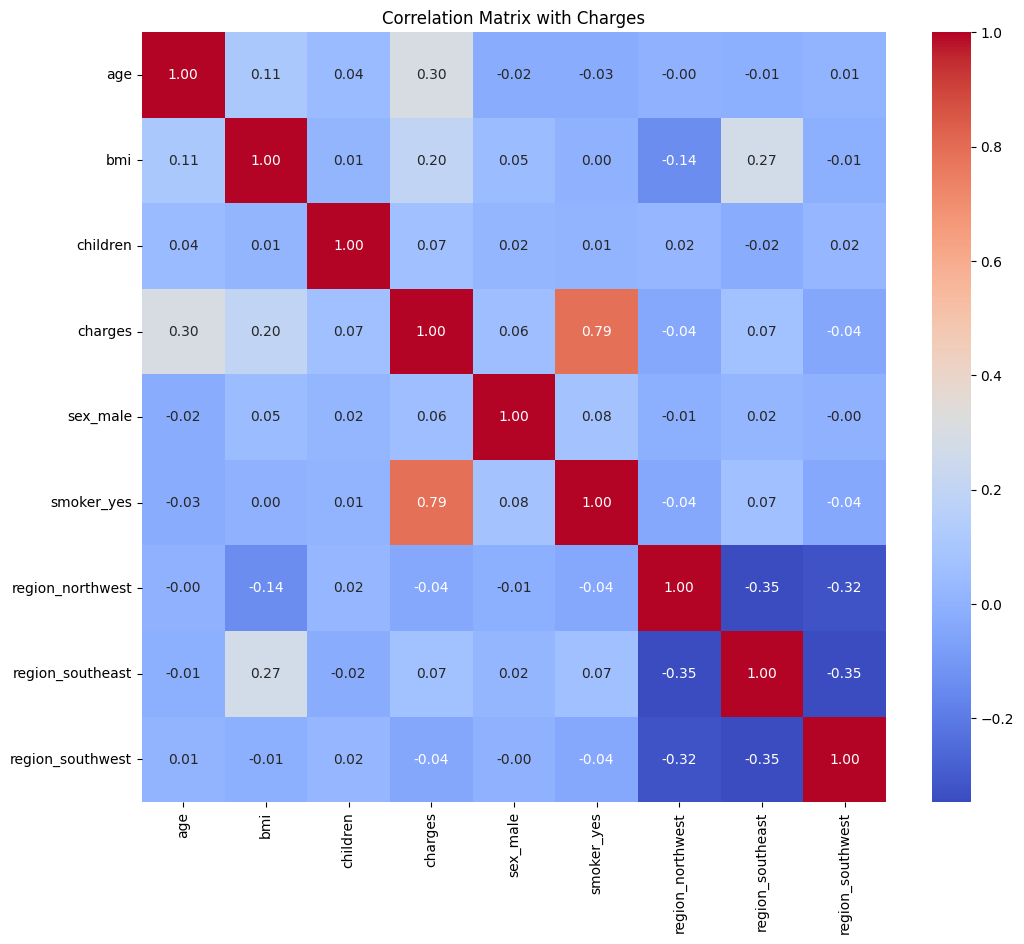

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame with standardized numerical and encoded categorical features

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Extract the correlation values for 'charges'
charges_correlation = correlation_matrix['charges']

# Sort the correlation values in descending order
sorted_correlation = charges_correlation.sort_values(ascending=False)

# Print the sorted correlation values
print(sorted_correlation)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix with Charges")
plt.show()

smoker_yes : 0.79'luk pozitif korelasyon değeri, sigara içenlerin sigorta ücretlerinin önemli ölçüde daha yüksek olduğunu gösteriyor. Bu, 'charges' değişkenini en çok etkileyen faktör..

age: 0.30'luk pozitif korelasyon değeri, yaş arttıkça sigorta ücretlerinin de arttığını gösteriyor.

bmi: 0.20'luk pozitif korelasyon değeri, vücut kitle indeksi arttıkça sigorta ücretlerinin de arttığını gösteriyor.

children: 0.07'lik pozitif korelasyon değeri, çocuk sayısı arttıkça sigorta ücretlerinin de biraz arttığını gösteriyor, ancak bu etki diğer faktörlere göre daha zayıf.

sex_male: 0.06'lık pozitif korelasyon değeri, erkeklerin sigorta ücretlerinin kadınlara göre biraz daha yüksek olduğunu gösteriyor, ancak bu etki de oldukça zayıf.

region: Bölge değişkenleri ('region_northwest', 'region_southeast', 'region_southwest') 'charges' değişkeni ile çok zayıf bir negatif korelasyona sahip. Bu, bölgenin sigorta ücretleri üzerinde çok büyük bir etkisi olmadığını gösteriyor.

!!!Sigorta ücretlerini (charges) en çok etkileyen değişkenler sigara içme durumu (smoker_yes), yaş (age) ve vücut kitle indeksi (bmi). Sigara içenlerin sigorta ücretleri önemli ölçüde daha yüksek ve yaş ve BMI arttıkça sigorta ücretleri de artıyor. Diğer faktörlerin etkisi ise daha zayıf.

In [55]:
# Bağımlı değişken
y = df_encoded['charges']

# Bağımsız değişkenle
X = df_encoded.drop('charges', axis=1)

print("Bağımlı Değişken (y):\n", y.head())
print("\nBağımsız Değişkenler (X):\n", X.head())

Bağımlı Değişken (y):
 0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Bağımsız Değişkenler (X):
         age       bmi  children  sex_male  smoker_yes  region_northwest  \
0 -1.438764 -0.453320 -0.908614     False        True             False   
1 -1.509965  0.509621 -0.078767      True       False             False   
2 -0.797954  0.383307  1.580926      True       False             False   
3 -0.441948 -1.305531 -0.908614      True       False              True   
4 -0.513149 -0.292556 -0.908614      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [58]:
y_pred = model.predict(X_test)

# MSE ve R-kare skorunu hesapla
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 33596915.85136147
R-squared Score: 0.7835929767120723


In [59]:
df_encoded['log_charges'] = np.log(df_encoded['charges'])

# bağımlı değişken güncelle
y_log = df_encoded['log_charges']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

model_log = LinearRegression()
model_log.fit(X_train_log, y_train_log)

LinearRegression()

In [60]:
# Test verileri üzerinde tahmin yap (log dönüşümlü veri ile)
y_pred_log = model_log.predict(X_test_log)

# MSE ve R-kare skorunu hesapla (log dönüşümlü veri ile)
mse_log = mean_squared_error(y_test_log, y_pred_log)
r2_log = r2_score(y_test_log, y_pred_log)

print("Dönüşüm Sonrası - Mean Squared Error (MSE):", mse_log)
print("Dönüşüm Sonrası - R-squared Score:", r2_log)

print("\nDönüşüm Öncesi - Mean Squared Error (MSE):", mse)  # Önceki MSE değeri
print("Dönüşüm Öncesi - R-squared Score:", r2)  # Önceki R-kare değeri

Dönüşüm Sonrası - Mean Squared Error (MSE): 0.1755741639679167
Dönüşüm Sonrası - R-squared Score: 0.8047311493462985

Dönüşüm Öncesi - Mean Squared Error (MSE): 33596915.85136147
Dönüşüm Öncesi - R-squared Score: 0.7835929767120723


Logaritmik dönüşüm, charges değişkenindeki dağılımı normal dağılıma yaklaştırmaya yardımcı olabilir ve bu da lineer regresyon modelinin performansını artırabilir. Dönüşüm sonrası MSE ve R-kare değerlerindeki iyileşme, logaritmik dönüşümün modelin performansını olumlu yönde etkilediğini gösterir.

In [62]:
best_degree = 1
best_mse = float('inf')


for degree in range(1, 6):
    # Polinomsal özellikler oluştur
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Verileri eğitim ve test kümelerine ayır
    X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    # Lineer regresyon modelini oluştur ve eğit
    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)

    # Test verileri üzerinde tahmin yap
    y_pred_poly = model_poly.predict(X_test_poly)

    # MSE ve R-kare skorunu hesapla
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)

    print(f"Derece {degree}:")
    print("Mean Squared Error (MSE):", mse_poly)
    print("R-squared Score:", r2_poly)
    print("-" * 20)

    # En iyi dereceyi ve MSE'yi güncelle
    if mse_poly < best_mse:
        best_mse = mse_poly
        best_degree = degree

print(f"En iyi polinom derecesi: {best_degree}, MSE: {best_mse}")

Derece 1:
Mean Squared Error (MSE): 33596915.85136149
R-squared Score: 0.7835929767120722
--------------------
Derece 2:
Mean Squared Error (MSE): 20712805.987918388
R-squared Score: 0.866583090316484
--------------------
Derece 3:
Mean Squared Error (MSE): 23498217.998933967
R-squared Score: 0.848641481491402
--------------------
Derece 4:
Mean Squared Error (MSE): 38158498.332725726
R-squared Score: 0.7542105628428422
--------------------
Derece 5:
Mean Squared Error (MSE): 196174964.1979304
R-squared Score: -0.26361717943135377
--------------------
En iyi polinom derecesi: 2, MSE: 20712805.987918388


In [67]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


degree = 2


poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Verileri eğitim ve test kümelerine ayır
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Ridge Regresyon
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train)
y_pred_ridge = ridge_model.predict(X_test_poly)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Lasso Regresyon
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_poly, y_train)
y_pred_lasso = lasso_model.predict(X_test_poly)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Ridge Regresyon:")
print("Mean Squared Error (MSE):", mse_ridge)
print("R-squared Score:", r2_ridge)
print("-" * 20)

print("Lasso Regresyon:")
print("Mean Squared Error (MSE):", mse_lasso)
print("R-squared Score:", r2_lasso)
print("-" * 20)

Ridge Regresyon:
Mean Squared Error (MSE): 20705110.96077959
R-squared Score: 0.8666326561136718
--------------------
Lasso Regresyon:
Mean Squared Error (MSE): 20663423.79840677
R-squared Score: 0.8669011746514547
--------------------
